This first block of text simply contains all the libraries that need importing as well as initialsing some variables of this example. You may change the batch_size and epochs variables, but should not change num_classes, img_rows and img_cols as these depend on the dataset being used

In [8]:
import os
import zipfile

In [ ]:
# !pip install numpy keras tf-explain matplotlib
# !pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.0 MB/s eta 0:00:00


In [9]:
import numpy as np
import keras
from keras import layers
# from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
import matplotlib.pyplot as plt


batch_size = 128
epochs = 15
num_classes = 10
input_shape = (150, 150, 3)

The next block of text handles all the data loading and reshaping so that it can be used to train and evaluate the CNN models. Two sets of data are loaded, the training data, used to generate the model, and the test data, used to evaluate if this model is good at making predictions

In [11]:
results_dir = 'results'
extracted_data_dir = 'data/extracted_data'
zip_path = "data/retinal-oct-sample.zip"
def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
        print(f"Created directory {os.path.abspath(extract_to)} for extraction.")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted all files from {os.path.abspath(zip_path)} to {os.path.abspath(extract_to)}.")
extract_zip(zip_path, extracted_data_dir)



Extracted all files from c:\Users\sanja\bio_coursework\data\retinal-oct-sample.zip to c:\Users\sanja\bio_coursework\data\extracted_data.


In [7]:
IMG_SIZE =  (150, 150)
class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

train_ds = keras.utils.image_dataset_from_directory(
    'results/train_sample2',
    image_size= IMG_SIZE,
    batch_size = batch_size,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    'results/test',
    image_size= IMG_SIZE,
    batch_size = batch_size,
    label_mode="categorical",
    shuffle = False
)

val_ds = keras.utils.image_dataset_from_directory(
    'results/val',
    image_size= IMG_SIZE,
    batch_size = batch_size,
    label_mode="categorical"
)

class_names = test_ds.class_names
print(class_names)

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y:  (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y:  (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y:  (normalization_layer(x), y))

Found 4000 files belonging to 4 classes.
Found 968 files belonging to 4 classes.
Found 32 files belonging to 4 classes.
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [60]:
# # Load the data and split it between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
# # Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

This block of code defines the layers of the CNN model, compiles it and shows a textual summary

In [94]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.BatchNormalization(),
        # layers.Dropout(0.4),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        #layers.BatchNormalization(),
        # layers.Dropout(0.4),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
import keras_tuner as kt
from tensorflow import keras
from keras import layers

def build_model(hp):
    # Define ranges to test
    # ---------------------
    # Test filters between 32 and 128
    hp_filters_1 = hp.Int('filters_1', min_value=32, max_value=128, step=32)
    hp_filters_2 = hp.Int('filters_2', min_value=64, max_value=256, step=64)

    # Test dropout between 0.2 and 0.5
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)

    # Test learning rate
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Build the model
    # ---------------------
    model = keras.Sequential([
        keras.Input(shape=(150, 150, 3)),
        layers.Rescaling(1./255),

        # Layer 1 (Variable filters)
        layers.Conv2D(hp_filters_1, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Layer 2 (Variable filters)
        layers.Conv2D(hp_filters_2, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),

        # Variable Dropout
        layers.Dropout(hp_dropout),

        layers.Dense(4, activation="softmax"),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,             # Max epochs per trial
    factor=3,                  # Reduction factor
    directory='my_dir',        # Where to save results
    project_name='oct_tuning'
)

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
print("Starting Hyperparameter Search...")
tuner.search(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[stop_early]
)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of filters in layer 1 is {best_hps.get('filters_1')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 02m 27s]
val_accuracy: 0.28125

Best val_accuracy So Far: 0.40625
Total elapsed time: 00h 25m 55s

The hyperparameter search is complete. 
The optimal number of filters in layer 1 is 32.
The optimal learning rate is 0.0001.

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.2579 - loss: 1.3866 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.2840 - loss: 1.3859 - val_accuracy: 0.2500 - val_loss: 1.3862
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.2721 - loss: 1.3845 - val_accuracy: 0.3750 - val_loss: 1.3863
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.2862 - loss: 1.3807 - val_accuracy: 0.2188 - val_loss: 1.3881
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.2915 - loss: 1.3800 - val_accuracy: 0.3125 - val_loss: 1.3880
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.2970 - loss: 1.3714 - val_accuracy: 0.2188 -

In [67]:
for images, labels in train_ds.take(1):
    print(f"Image Batch Shape: {images.shape}")
    print(f"Label Batch Shape: {labels.shape}")

Image Batch Shape: (128, 150, 150, 3)
Label Batch Shape: (128, 4)


This is the block of code that trains the model and evaluates its predictive capacity on the test data

In [95]:
num_classes = 4
input_shape = (150, 150, 3)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,             # Stop if no improvement for 5 epochs
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="best_custom_cnn.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

# Train the model
epochs = 30  # Set high, EarlyStopping will cut it short if needed

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.2544 - loss: 1.9889 - val_accuracy: 0.2500 - val_loss: 1.3825
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.2770 - loss: 1.3848 - val_accuracy: 0.2500 - val_loss: 1.3927
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.2887 - loss: 1.3658 - val_accuracy: 0.3750 - val_loss: 1.3664
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.3721 - loss: 1.3320 - val_accuracy: 0.3750 - val_loss: 1.3365
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 255ms/step - accuracy: 0.4147 - loss: 1.2584 - val_accuracy: 0.4688 - val_loss: 1.1342
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 341ms/step - accuracy: 0.4705 - loss: 1.1900 - val_accuracy: 0.5938 - val_loss: 0.9881
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.5537 - loss: 1.0473 - val_accuracy: 0.6250 - val_loss: 0.8503
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.6303 - loss: 0.9276 - val_accuracy:

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, classification_report

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
test_loss, test_acc = model.evaluate(test_ds, verbose=0)

# 2. Make Predictions on the Test Set
print("Generating predictions...")
y_pred_probs = model.predict(test_ds)

# 3. Convert Probabilities to Class Integers (e.g., [0, 0, 1] -> 2)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = []
for images, labels in test_ds:
    y_true.append(np.argmax(labels.numpy(), axis=1))
y_true = np.concatenate(y_true)

# 4. Calculate Macro F1 Score
macro_f1 = f1_score(y_true, y_pred, average='macro')

# --- Final Output ---
print("-" * 30)
print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Macro F1 Score: {macro_f1:.4f}")
print("-" * 30)

# Optional: Detailed Report
print("\nDetailed Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['CNV', 'DME', 'DRUSEN', 'NORMAL']))

Generating predictions...
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
------------------------------
Test Loss:      0.6323
Test Accuracy:  0.7572
Macro F1 Score: 0.7570
------------------------------

Detailed Classification Report:

              precision    recall  f1-score   support

         CNV       0.73      0.85      0.78       242
         DME       0.73      0.67      0.70       242
      DRUSEN       0.69      0.68      0.69       242
      NORMAL       0.90      0.82      0.86       242

    accuracy                           0.76       968
   macro avg       0.76      0.76      0.76       968
weighted avg       0.76      0.76      0.76       968



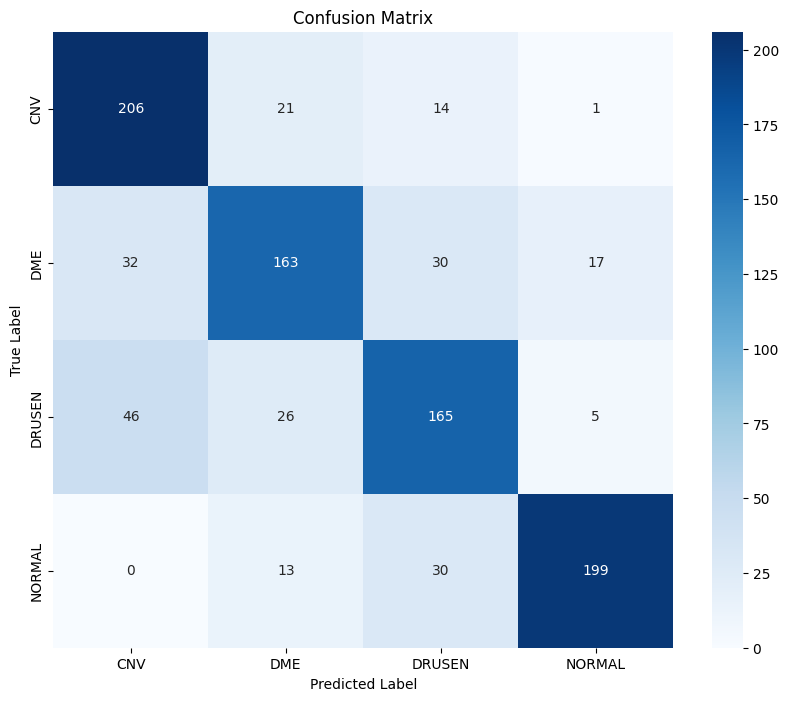

In [97]:
cm = confusion_matrix(y_true, y_pred)

# 5. Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

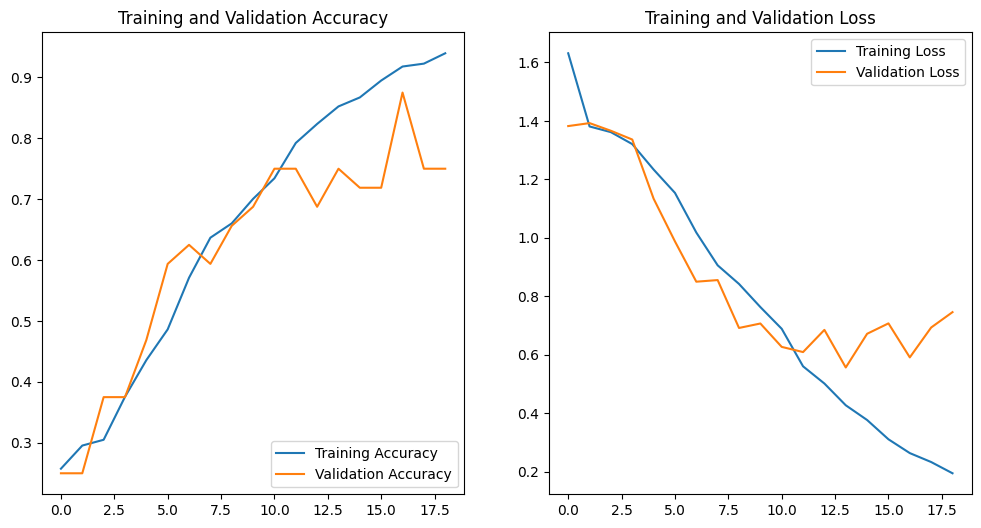

In [98]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This block of code picks an image from the test set (you can change the index to choose a different image), and shows the probabilities that the CNN model estimates for each class (i.e. digit), then shows the actual image.

In [ ]:
img_index = 15
image = x_test[img_index]

pred=model.predict(np.expand_dims(image, axis=0))[0]
for digit in range(10):
        print("Probability for digit {}: {}".format(digit,pred[digit]))
print("\nThe winner is {}".format(np.argmax(pred)))
print("The correct class is {}\n".format(np.argmax(y_test[img_index])))

plt.imshow(image.squeeze(),cmap='gray')
plt.show()

In the next block we are using a specialised library called tf-explain that contains a few advance algorithms to visualise the decision making process of CNNs.

This specific example uses one of the available techniques called "Occlusion sensitivity". If we block parts of the input image using a square of a certain size (4x4 pixels in the example below), would the output of the network for a given class change? If this is done systematically, the occlusion influence for each pixel in the image can be estimated.

In [ ]:
img_index = 60
image = x_test[img_index]
data = ([image], None)
explainer = OcclusionSensitivity()

fig, axs = plt.subplots(1,10,figsize=(25,25))
for cl in range(num_classes):
  grid = explainer.explain(data, model, cl, 4)
  axs[cl].imshow(grid)
  axs[cl].axis('off')
  axs[cl].set_title("Class = {}".format(cl))

plt.show()
